In [27]:
import numpy as np
from sklearn.metrics import silhouette_score

class ART1:
    def __init__(self, input_size=64, output_size=5, rho=0.5):
        self.input_size = input_size
        self.output_size = output_size
        self.rho = rho
        self.n_cats = 0
        
       
        self.Bij = np.ones((input_size, output_size)) * 0.2
        self.Tji = np.ones((output_size, input_size))

    def train(self, data):
        for pattern in data:
            self.present_input_pattern(pattern)

    def present_input_pattern(self, idata):
        # Present an input pattern to the model and update weights
        Y = np.dot(self.Bij.T, idata)
    
        while True:
            # Find the winning category (J)
            J = np.argmax(Y)
            
            # Calculate resonance match
            match = np.dot(self.Tji[J], idata) / np.sum(idata)
            
            # If match exceeds vigilance threshold (rho), update weights
            if match >= self.rho:
                # Update bottom-up weights
                self.Bij[:, J] += idata - self.Bij[:, J]
                
                # Update top-down weights
                self.Tji[J, :] = idata
                
                break
            else:
                # Disable the winning category and search for a new one
                Y[J] = -1

    def predict(self, idata):
        # Predict the category of an input pattern
        Y = np.dot(self.Bij.T, idata)
        J = np.argmax(Y)
        return J

def load_data(file_path):
    # Load traffic signal data from a text file
    data = []
    signal = []
    
    with open(file_path, 'r') as file:
        for line in file:
            # Remove trailing whitespace
            line = line.strip()
            
            # If the line is empty, it is a separation between signals
            if line == "":
                if signal:
                    # Convert the signal to a binary vector
                    vector = np.array([1 if char == 'X' else 0 for row in signal for char in row])
                    data.append(vector)
                    signal = []
            else:
                # Add the line to the current signal
                signal.append(line)
        
        # Process the last signal if it exists
        if signal:
            vector = np.array([1 if char == 'X' else 0 for row in signal for char in row])
            data.append(vector)
    
    return data

def test_model(model, test_data, expected_labels=None):
    # Test the model with test data
    correct_predictions = 0
    total_tests = len(test_data)
    prediction= []
    
    for idx, pattern in enumerate(test_data):
        # Predict the category of the pattern
        predicted_category = model.predict(pattern)
        
        # If ground truth labels are provided, compare the prediction with the expected label
        if expected_labels is not None:
            if predicted_category == expected_labels[idx]:
                correct_predictions += 1
        
        print(f"Pattern {idx + 1}: Predicted Category: {predicted_category}")
        prediction.append(predicted_category)

    
    # If ground truth labels are provided, calculate accuracy
    if expected_labels is not None:
        accuracy = correct_predictions / total_tests
        print(f"Accuracy: {accuracy * 100:.2f}%")

    return prediction

# Path to the text file with traffic signals (change this to your file path)
file_path = 'traffic_signals.txt'

# Load data from the file
data = load_data(file_path)

# Create an instance of the ART1 model
art1_model = ART1(input_size=64, output_size=5, rho=0.5)

# Train the model with the loaded data
art1_model.train(data)

# Assuming you have test data and expected labels (change these variables to your test data and labels)
test_data = data  # You may need to load or split different data for testing
expected_labels = None  # Replace with your expected labels if available

# Test the model with the test data and optional expected labels
predicion = test_model(art1_model, test_data, expected_labels)
#print(predicion)

silhouette = silhouette_score(data, predicion)
print("Coeficiente de silueta:", silhouette)


Pattern 1: Predicted Category: 0
Pattern 2: Predicted Category: 1
Pattern 3: Predicted Category: 2
Pattern 4: Predicted Category: 1
Pattern 5: Predicted Category: 0
Pattern 6: Predicted Category: 1
Pattern 7: Predicted Category: 1
Pattern 8: Predicted Category: 1
Pattern 9: Predicted Category: 4
Pattern 10: Predicted Category: 1
Pattern 11: Predicted Category: 1
Pattern 12: Predicted Category: 1
Coeficiente de silueta: 0.0802733919402291


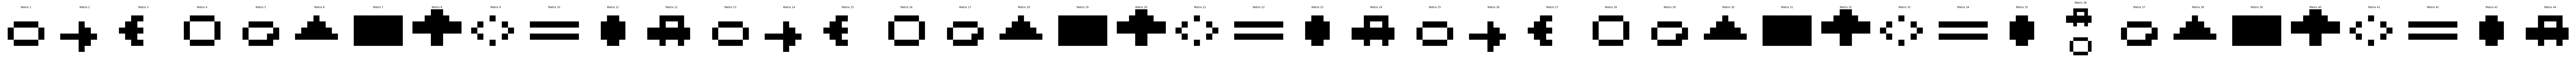

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(file_path):
    # Load traffic signal data from a text file
    data = []
    signal = []
    
    with open(file_path, 'r') as file:
        for line in file:
            # Remove trailing whitespace
            line = line.strip()
            
            # If the line is empty, it is a separation between signals
            if line == "":
                if signal:
                    # Convert the signal to a binary matrix
                    matrix = np.array([[1 if char == 'X' else 0 for char in row] for row in signal])
                    data.append(matrix)
                    signal = []
            else:
                # Add the line to the current signal
                signal.append(line)
        
        # Process the last signal if it exists
        if signal:
            matrix = np.array([[1 if char == 'X' else 0 for char in row] for row in signal])
            data.append(matrix)
    
    return data

# Function to display the matrices
def display_matrices(matrices):
    num_matrices = len(matrices)
    fig, axs = plt.subplots(1, num_matrices, figsize=(5*num_matrices, 5))
    
    for i, matrix in enumerate(matrices):
        axs[i].imshow(matrix, cmap='binary', interpolation='nearest')
        axs[i].set_title(f"Matrix {i+1}")
        axs[i].axis('off')
    
    plt.show()

# Example usage
file_path = 'traffic_signals.txt'
matrices = load_data(file_path)
display_matrices(matrices)


In [18]:
import numpy as np

def generate_traffic_signals(num_samples):
    # Define el conjunto de caracteres para representar las señales de tráfico
    signal_chars = ['X', '.']
    
    # Define el tamaño de la señal de tráfico (ancho x alto)
    signal_width = 8
    signal_height = 8
    
    # Define el número total de señales de tráfico a generar
    total_signals = num_samples
    
    # Lista para almacenar las señales de tráfico generadas
    traffic_signals = []
    
    # Genera las señales de tráfico
    for _ in range(total_signals):
        # Genera una señal de tráfico aleatoria
        signal = np.random.choice(signal_chars, size=(signal_height, signal_width))
        
        # Convierte la señal de tráfico en una cadena de texto y agrega a la lista
        signal_str = '\n'.join([''.join(row) for row in signal])
        traffic_signals.append(signal_str)
    
    return traffic_signals

# Genera un dataset de señales de tráfico
dataset_size = 50  # Define el número de señales de tráfico a generar
traffic_signals_dataset = generate_traffic_signals(dataset_size)

# Guarda el dataset en un archivo de texto
file_path = 'traffic_signals_dataset.txt'
with open(file_path, 'w') as file:
    for signal in traffic_signals_dataset:
        file.write(signal)
        file.write('\n\n')


In [19]:
import numpy as np

# Definir símbolos para la señal de tráfico
empty = '.'
signal = 'X'

# Definir las dimensiones de la señal de tráfico
rows, cols = 8, 8

# Definir el número de señales de tráfico en el conjunto de datos
num_signals = 20

# Crear un conjunto de datos de señales de tráfico
data = []
for _ in range(num_signals):
    # Crear una señal de tráfico aleatoria
    signal_data = np.random.choice([empty, signal], size=(rows, cols))
    signal_str = '\n'.join([''.join(row) for row in signal_data])
    data.append(signal_str)

# Guardar los datos en un archivo de texto
file_path = 'traffic_signals.txt'
with open(file_path, 'w') as file:
    for signal_str in data:
        file.write(signal_str)
        file.write('\n\n')

print("Señales de tráfico generadas y guardadas en:", file_path)


Señales de tráfico generadas y guardadas en: traffic_signals.txt
